### FAULTY AIR QUALITY SENSOR CHALLENGE

#### VYRODOK TEAM
School: EDSA

- Eric Mbuthia
- Linda Kelida
- Teddy Waweru
- Jessica Njuguna

# 1. EDA Process

#### Import EDA Packages

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#### Import Data

In [165]:
#A00
# Load Files
raw_train_df = pd.read_csv('Challenge/data/train.csv', parse_dates=['Datetime'])
raw_test_df = pd.read_csv('Challenge/data/test.csv', parse_dates=['Datetime'])
raw_samp_df = pd.read_csv('Challenge/data/SampleSubmission.csv')

## Statistical Summaries

In [155]:
raw_train_df.columns, raw_test_df.columns, samp_df.columns

(Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
        'Relative_Humidity', 'Offset_fault'],
       dtype='object'),
 Index(['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'HOUR',
        'HOUR_OF_WEEK', 'SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'TEMPERATURE',
        'RELATIVE_HUMIDITY', 'OFFSET_FAULT'],
       dtype='object'),
 Index(['ID', 'Offset_fault'], dtype='object'))

In [167]:
raw_train_df.shape, raw_test_df.shape, raw_samp_df.shape

((297177, 7), (127361, 6), (127361, 2))

In [157]:
raw_train_df.info(), raw_train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


(None,
 ID                           object
 Datetime             datetime64[ns]
 Sensor1_PM2.5               float64
 Sensor2_PM2.5               float64
 Temperature                 float64
 Relative_Humidity           float64
 Offset_fault                  int64
 dtype: object)

We convert the Datetime column to datetime format, & add columns for the year, month, day & hour <br/>
We shall have this in a function so it can be reused later.

We shall declare a function that will contain these initial changes, in case we need to repeat the preparation of the dataset to contain these columns.
(May be updated with other functions)

In [158]:
#Input: Expects df similar to the original dataset
#Output: DF with the following columns:

def prepare_df(_df):

    df = _df.copy(deep=True)


    # Add columns for year, month, day, hour
    df['YEAR'] = pd.DatetimeIndex(df['Datetime']).year
    df['MONTH'] = pd.DatetimeIndex(df['Datetime']).month
    df['DAY'] = pd.DatetimeIndex(df['Datetime']).day
    df['HOUR'] = pd.DatetimeIndex(df['Datetime']).hour
    df['DAY_OF_WEEK'] = pd.DatetimeIndex(df['Datetime']).dayofweek
    df['HOUR_OF_WEEK'] = ((pd.DatetimeIndex(df['Datetime']).dayofweek * 24) + pd.DatetimeIndex(df['Datetime']).hour)


    #Standardize column titles
    df.rename(
        columns = {
            'Datetime': 'DATETIME', 'Sensor1_PM2.5' : 'SENSOR1_PM2.5',
            'Sensor2_PM2.5' : 'SENSOR2_PM2.5', 'Temperature': 'TEMPERATURE',
            'Relative_Humidity': 'RELATIVE_HUMIDITY', 'Offset_fault': 'OFFSET_FAULT'
        }, inplace=True
    )

    #Re-order columns
    df = df.reindex(
        columns = ['ID'] + ['DATETIME'] + ['YEAR'] + ['MONTH'] + ['DAY'] + \
            ['DAY_OF_WEEK'] + ['HOUR'] + ['HOUR_OF_WEEK'] + \
            [col for col in df.columns if col not in \
                ['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'HOUR',
                'OFFSET_FAULT', 'DAY_OF_WEEK', 'HOUR_OF_WEEK']]\
                    + ['OFFSET_FAULT']
    )

    return df

In [168]:
train_df = prepare_df(raw_train_df)
test_df = prepare_df(raw_test_df)

In [163]:
train_df.head()

,ID,DATETIME,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_PM2.5,SENSOR2_PM2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,2021,11,3,2,4,52,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,2021,11,8,0,18,18,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,2021,11,7,6,9,153,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,2022,1,1,5,18,138,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,2021,11,5,4,22,118,38.30,34.77,20.9,89.0,0


In [162]:
train_df.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_PM2.5,SENSOR2_PM2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT
count,297177.00,297177.00,297177.00,297177.00,297177.00,297177.00,293563.00,293563.00,293628.00,293628.00,297177.00
mean,2021.21,9.07,15.99,2.99,11.39,83.14,40.75,38.18,23.32,78.65,0.37
std,0.41,4.19,8.67,2.00,6.94,48.55,28.53,28.65,3.84,14.77,0.48
min,2021.00,1.00,1.00,0.00,0.00,0.00,-9.45,-9.70,16.70,27.00,0.00
25%,2021.00,10.00,9.00,1.00,5.00,41.00,22.43,19.52,20.40,68.00,0.00
50%,2021.00,11.00,16.00,3.00,11.00,83.00,36.47,33.72,21.90,84.00,0.00
75%,2021.00,12.00,23.00,5.00,17.00,125.00,49.42,47.57,26.30,91.00,1.00
max,2022.00,12.00,31.00,6.00,23.00,167.00,997.96,997.26,34.90,99.00,1.00


### Dealing with Null Values

In [169]:
train_df.isna().sum(), test_df.isna().sum()

(ID                      0
 DATETIME                0
 YEAR                    0
 MONTH                   0
 DAY                     0
 DAY_OF_WEEK             0
 HOUR                    0
 HOUR_OF_WEEK            0
 SENSOR1_PM2.5        3614
 SENSOR2_PM2.5        3614
 TEMPERATURE          3549
 RELATIVE_HUMIDITY    3549
 OFFSET_FAULT            0
 dtype: int64,
 ID                        0
 DATETIME                  0
 YEAR                      0
 MONTH                     0
 DAY                       0
 DAY_OF_WEEK               0
 HOUR                      0
 HOUR_OF_WEEK              0
 SENSOR1_PM2.5             0
 SENSOR2_PM2.5             0
 TEMPERATURE           88090
 RELATIVE_HUMIDITY     88090
 OFFSET_FAULT         127361
 dtype: int64)

Option 1: Drop rows with Null values

In [ ]:
def drop_na(_df):
    df = _df.copy(deep=True)
    
    df= df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

    return df

Option 2: Replace with Mean values

In [170]:
def fill_na_mean(_df, type = 'train'):
    df = _df.copy(deep=True)
    if type == 'train':
        df['SENSOR1_PM2.5'] = df['SENSOR1_PM2.5'].fillna(df['SENSOR1_PM2.5'].mean())
        df['SENSOR2_PM2.5'] = df['SENSOR2_PM2.5'].fillna(df['SENSOR2_PM2.5'].mean())
        df['TEMPERATURE'] = df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean())
        df['RELATIVE_HUMIDITY'] = df['RELATIVE_HUMIDITY'].fillna(df['RELATIVE_HUMIDITY'].mean())
    else:
        df['TEMPERATURE'] = df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean())
        df['RELATIVE_HUMIDITY'] = df['RELATIVE_HUMIDITY'].fillna(df['RELATIVE_HUMIDITY'].mean())

    return df



Option 3: For Relative_Humidity & Temperature, replace with cross values if they're available. <br>
ie. if row has Relative_humidity but Temperature is blank, determine the relative ratio between them & use this for the calculation.

In [174]:
train_df[['RELATIVE_HUMIDITY', 'TEMPERATURE']].describe()

,RELATIVE_HUMIDITY,TEMPERATURE
count,293628.000000,293628.000000
mean,78.653623,23.316554
std,14.772725,3.836971
min,27.000000,16.700000
25%,68.000000,20.400000
50%,84.000000,21.900000
75%,91.000000,26.300000
max,99.000000,34.900000


By using ratios, we can consider the ranges of the values, for a closer relatable value to use to replace, which would be more accurate than using the mean.

## Visualizations

### Time Series

In [215]:
fig, axs = plt.subplots(figsize = (30,10))

axs.plot(train_df['DATETIME'], train_df['RELATIVE_HUMIDITY'])


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 2160x720 with 1 Axes>

### Target Variable Distribution

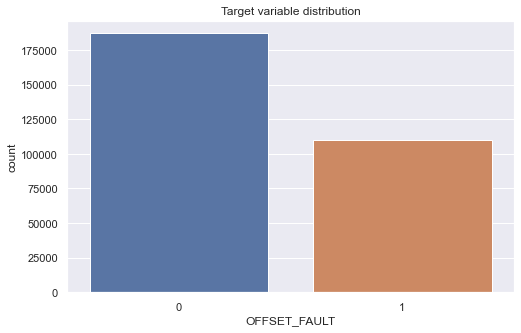

In [216]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(x = train_df["OFFSET_FAULT"])
plt.title('Target variable distribution')
plt.show()

### Outliers

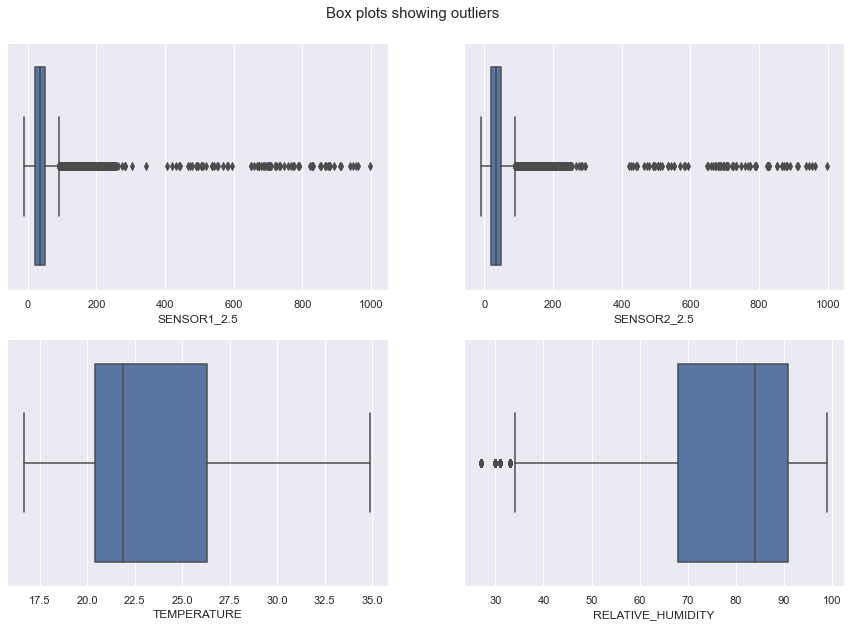

In [217]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train_df, ['SENSOR1_2.5',	'SENSOR2_2.5',	'TEMPERATURE',	'RELATIVE_HUMIDITY']):
  sns.boxplot(x = train_df[name], ax = ax)

In [173]:
train_df.kurtosis()

C:\Users\teddy\AppData\Local\Temp/ipykernel_26236/861045134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


YEAR                  0.073008
MONTH                -0.046183
DAY                  -1.118707
DAY_OF_WEEK          -1.248912
HOUR                 -1.212467
HOUR_OF_WEEK         -1.195986
SENSOR1_PM2.5        97.920918
SENSOR2_PM2.5        97.960266
TEMPERATURE          -0.632673
RELATIVE_HUMIDITY    -0.252337
OFFSET_FAULT         -1.715106
dtype: float64

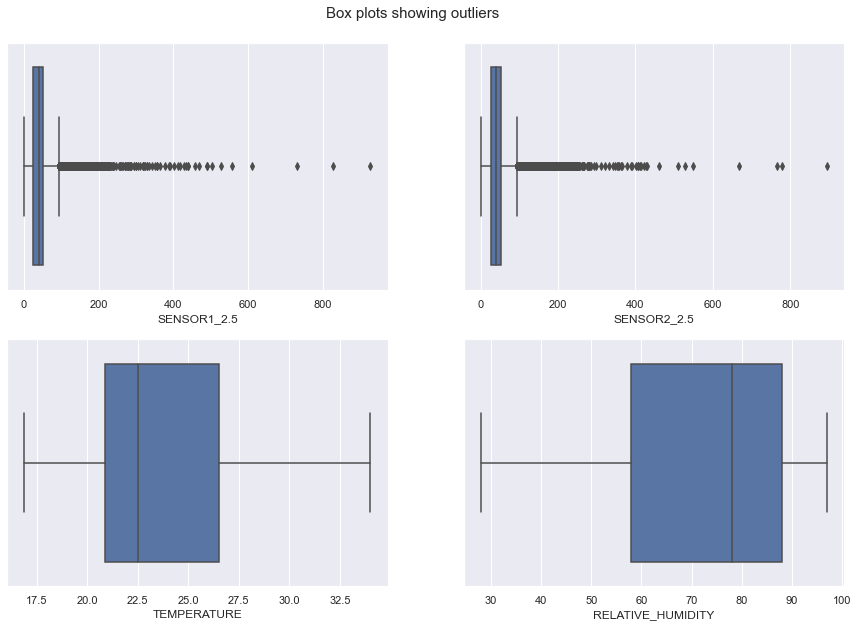

In [218]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), test_df, ['SENSOR1_2.5',	'SENSOR2_2.5',	'TEMPERATURE',	'RELATIVE_HUMIDITY']):
  sns.boxplot(x = test_df[name], ax = ax)

In [219]:
train_df.columns, test_df.columns

(Index(['ID', 'DATETIME', 'SENSOR1_2.5', 'SENSOR2_2.5', 'TEMPERATURE',
        'RELATIVE_HUMIDITY', 'OFFSET_FAULT', 'YEAR', 'MONTH', 'DAY', 'HOUR',
        'DAY_OF_WEEK', 'HOUR_OF_WEEK'],
       dtype='object'),
 Index(['ID', 'DATETIME', 'SENSOR1_2.5', 'SENSOR2_2.5', 'TEMPERATURE',
        'RELATIVE_HUMIDITY', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'DAY_OF_WEEK',
        'HOUR_OF_WEEK'],
       dtype='object'))

### Feature Correlation

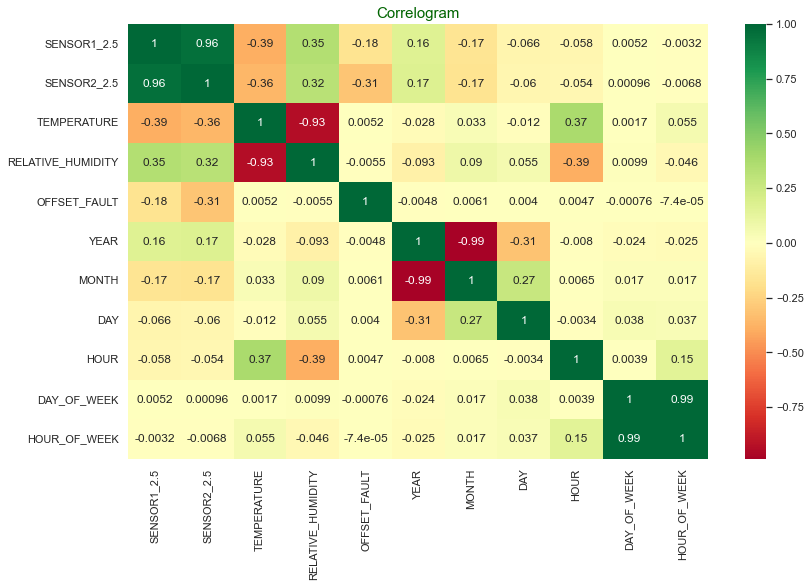

In [220]:
#Quantify correlations
corr = train_df.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# 2. Feature Engineering

drop the datetime and id columns

### Scaling of Data

In [226]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()
# fit and transform in one step
standardized = scaler.fit_transform(train_df2)
# convert the scaled predictor values into a dataframe
train_df3 = pd.DataFrame(standardized,columns=train_df2.columns)
train_df3.head()

,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
0,0.408344,0.389972,-1.541598,1.175348,-0.512412,0.457146,-1.480885,-1.054724,-0.500162,-0.645040
1,-0.197635,-0.171258,0.436566,-0.244350,-0.512412,0.457146,-0.906539,0.954310,-1.495324,-1.341841
2,-0.759557,-0.515934,0.410537,-0.244350,-0.512412,0.457146,-1.021408,-0.337212,1.490163,1.424869
3,-0.751864,-0.795156,0.410537,-0.582373,1.951554,-1.926719,-1.710624,0.954310,0.992582,1.117457
4,-0.090986,-0.123560,-0.630602,0.702115,-0.512412,0.457146,-1.251147,1.528319,0.495001,0.707574


In [227]:
scaler = StandardScaler()
# fit and transform in one step
standardized = scaler.fit_transform(test_df1)
# convert the scaled predictor values into a dataframe
test_df2 = pd.DataFrame(standardized,columns=test_df1.columns)
test_df2.head()

,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
0,1.030713,1.764043,-0.398291,-0.896976,0.0,-0.835191,0.858232,-0.513594,0.555191,0.478669
1,10.600473,9.055564,1.185383,-0.509772,0.0,-0.835191,0.530164,0.803478,-1.538324,-1.418627
2,0.140848,0.791735,-0.559342,0.541209,0.0,-0.835191,1.104283,-0.659935,-1.538324,-1.636708
3,0.336373,-0.175857,-0.264081,0.430580,0.0,-0.835191,1.104283,-1.684325,-1.538324,-1.789364
4,-0.284080,-0.465066,-0.935129,0.873098,0.0,1.197330,-1.356225,-1.537984,-1.014945,-1.244163


In [228]:

X = train_df3
y = train_df1.OFFSET_FAULT

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiating the model
clf = RandomForestClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.7317897350137061


              precision    recall  f1-score   support

           0       0.71      0.96      0.82     36634
           1       0.84      0.34      0.48     21369

    accuracy                           0.73     58003
   macro avg       0.77      0.65      0.65     58003
weighted avg       0.76      0.73      0.69     58003



# 3. Modelling

### Model Preparation

#### Import Packages

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Packages for measuring model's accuracy
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Preprocessing Test Data

In [175]:
test_df = prepare_df(raw_test_df)

In [176]:
test_df.shape, test_df.isna().sum()

((127361, 13),
 ID                        0
 DATETIME                  0
 YEAR                      0
 MONTH                     0
 DAY                       0
 DAY_OF_WEEK               0
 HOUR                      0
 HOUR_OF_WEEK              0
 SENSOR1_PM2.5             0
 SENSOR2_PM2.5             0
 TEMPERATURE           88090
 RELATIVE_HUMIDITY     88090
 OFFSET_FAULT         127361
 dtype: int64)

#### Dealing with Null Values

This step is necessary, otherwise the model fitting will fail

In [184]:
test_df = fill_na_mean(test_df, 'test') #Flll the NaN values with the mean value

In [190]:
test_df.isna().sum()

ID                        0
DATETIME                  0
YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
HOUR                      0
HOUR_OF_WEEK              0
SENSOR1_PM2.5             0
SENSOR2_PM2.5             0
TEMPERATURE               0
RELATIVE_HUMIDITY         0
OFFSET_FAULT         127361
dtype: int64

### DecisionTree Classifier

In [220]:
#Function to take df with valid columns to be used for model fitting.
# Output is the DecisionTreeClassifier
#Additional parameters for the Classifier can be passed
def dtc_model(_df,
                max_depth = 6,
                criterion = 'entropy',
                random_state = 0):


    df = _df.copy(deep=True)

    X = df[[col for col in df.columns if col not in \
        ['OFFSET_FAULT', 'ID', 'DATETIME']
        ]]
    y = df['OFFSET_FAULT']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    # Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                    criterion = criterion,
                                    random_state=random_state)

    # Fit dt to the training set
    dtc.fit(X_train, y_train)

    # Predict test set labels
    y_pred = dtc.predict(X_test)

    # Compute test set accuracy  
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'{classification_report(y_test, y_pred)}')

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)

    fig, axs = plt.subplots(1,2, figsize = (15,10))

    disp.plot(ax=axs[1])

    # Plot Feature Importance Bar Chart
    impo_df = pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
    impo_df = impo_df.sort_values(by = 'importance', ascending = True)
    impo_df.plot(kind = 'barh', color = 'purple', ax = axs[0])

    plt.show()

    return dtc

Example of Calling the above function:

Accuracy score: 0.7606501110438119


              precision    recall  f1-score   support

           0       0.88      0.71      0.79     55966
           1       0.63      0.84      0.72     33188

    accuracy                           0.76     89154
   macro avg       0.76      0.78      0.76     89154
weighted avg       0.79      0.76      0.76     89154



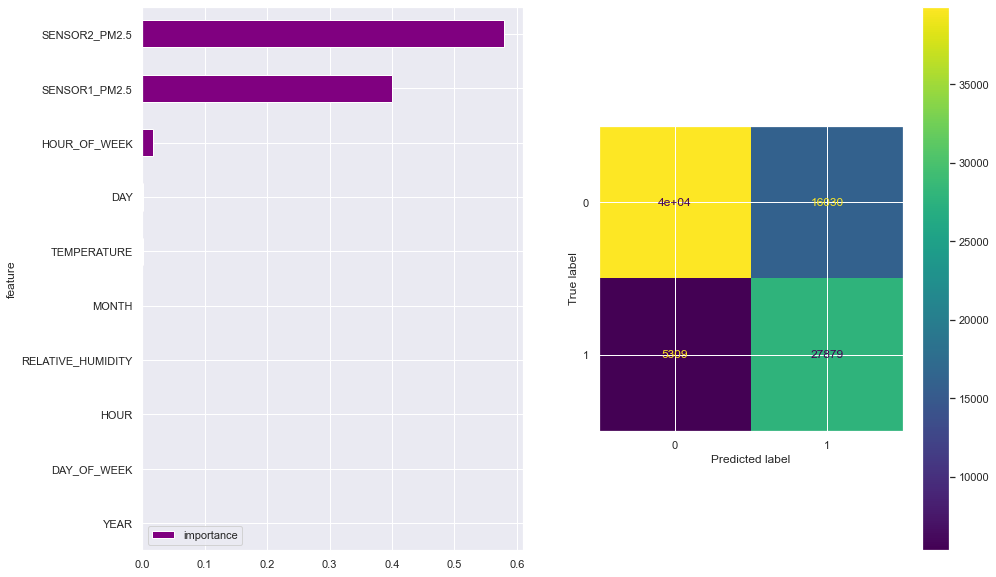

In [221]:
#Create columns as per the preparation function
train_df = prepare_df(raw_train_df)

#Fill the Nan values using mean values
train_df = fill_na_mean(train_df)

#At this point, we can select specific columns to be used in the fitting.
#We can experiment by using the SENSOR1_PM2.5, SENSOR2_PM2.5, TEMPERATURE & HOUR columns
# NOTE that the OFFSET_FAULT column should always be included
# model_cols = ['SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'TEMPERATURE', 'HOUR', 'OFFSET_FAULT']

#If we want to use all columns, uncomment the line below
model_cols = [col for col in train_df.columns]

# The following columns are removed in the function itself: ID, DATETIME

#Fit the model
dtc_ = dtc_model(train_df[model_cols])

### Random Forest Classifier

In [224]:
#Function to take df with valid columns to be used for model fitting.
# OUtput is the RandomForestClassifier
#Function can take additional paramters for the RandomForestClassifier Model.
def rfc_model(_df,
                max_depth=8,
                n_estimators=8,
                random_state=0):

    df = _df.copy(deep=True)

    # Splitting the dataset into X & y
    X = train_df[[col for col in train_df.columns if col not in\
        ['OFFSET_FAULT', 'ID', 'DATETIME']
        ]]
    y = train_df['OFFSET_FAULT']

    #Splitting the data into training & testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                            random_state= 42)

    # Instantiate the RandomForestClassifier & fit the train data
    rfc = RandomForestClassifier(max_depth= max_depth,
                                n_estimators = n_estimators,
                                random_state= random_state)
    #Fit the train data
    rfc.fit(X_train, y_train)

    #Test the model
    y_pred = rfc.predict(X_test)

    #Calculate the model's accuracy
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'{classification_report(y_test, y_pred)}')

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

    fig, axs = plt.subplots(1,2, figsize = (15,10))

    disp.plot(ax=axs[1])

    # Plot Feature Importance Bar Chart
    impo_df = pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
    impo_df = impo_df.sort_values(by = 'importance', ascending = True)
    impo_df.plot(kind = 'barh', color = 'purple', ax = axs[0])

    # plt.show()

    return rfc



Example of calling the above function:

Accuracy score: 0.8534221683827983


              precision    recall  f1-score   support

           0       0.86      0.92      0.89     37442
           1       0.85      0.74      0.79     21994

    accuracy                           0.85     59436
   macro avg       0.85      0.83      0.84     59436
weighted avg       0.85      0.85      0.85     59436



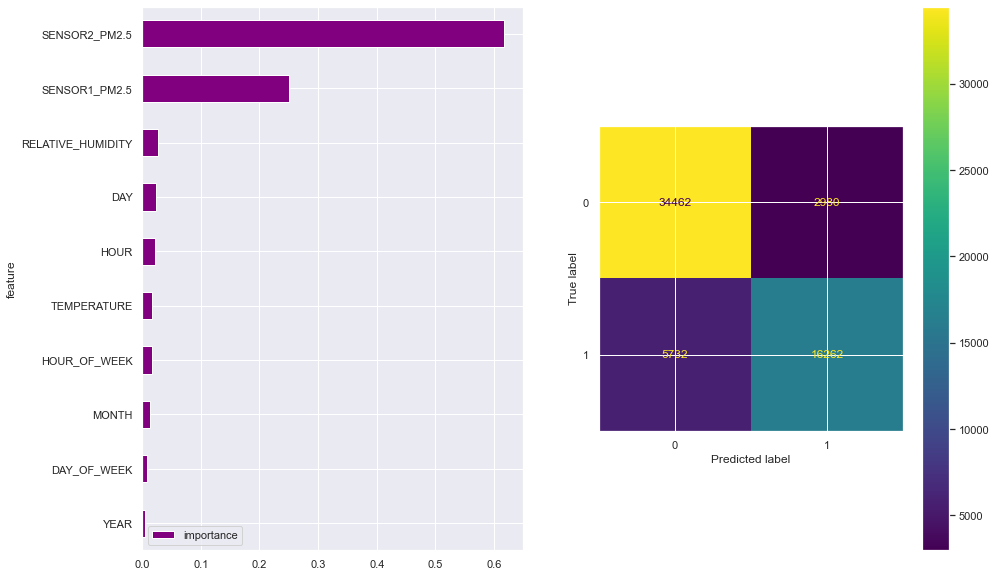

In [225]:
#Create columns as per the preparation function
train_df = prepare_df(raw_train_df)

#Fill the Nan values using mean values
train_df = fill_na_mean(train_df)

#At this point, we can select specific columns to be used in the fitting.
#We can experiment by using the SENSOR1_PM2.5, SENSOR2_PM2.5, TEMPERATURE & HOUR columns
# NOTE that the OFFSET_FAULT column should always be included
# model_cols = ['SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'TEMPERATURE', 'HOUR', 'OFFSET_FAULT']

#If we want to use all columns, uncomment the line below
model_cols = [col for col in train_df.columns]

# The following columns are removed in the function itself: ID, DATETIME

#Fit the model
rfc_ = rfc_model(train_df[model_cols])

## Hyper Parameter Tuning

We can choose to either run the functions multiple times with different variables for the model's hyperparameters, or utilize the GridSearch function

#### Iterating the above functions

In [231]:
%%capture cap --no-stderr
#The above magic command will enable saving the output of the cell
#For tuning the RandomForestClassifier parameters:

#Code for filtering the dataset's features can be included here.


#Declare the list of hyper parameters to loop through.
# NOTE that the duration of running the functions will be EXPONENTIAL to the number of points in the parameters
#ie. 3 parameters with three points will  have a Big O Notation of (3 ** 3)
n_estimators = [8,10]
max_depths = [8,10]
random_states = [30]


#Create iterative loops to be looped through.
for n_estimator in n_estimators:
    for max_depth in max_depths:
        for random_state in random_states:
            print('Max_depth: \t {} \n N_estimators: \t {} \n Random_state: \t {} \n'\
                .format(max_depth, n_estimator, random_state))
            rfc_ = rfc_model(train_df, max_depth=max_depth,
                                        n_estimators=n_estimator,
                                        random_state=random_state)

#Save the output to a file
#May be required to be run twixe if the error 'cap does not exist' is observed.
with open('Challenge/data/rfc_tuning.txt', "w") as f:
    f.write(cap.stdout)

### GridSearch Functionality

#### XG Boost Classifier

## Prepare Submission Output

raw_samp_df

In [151]:
test_pred = rfc.predict(test_df[X.columns])
rfc_sub_file = raw_samp_df.copy(deep = True)
rfc_sub_file['Offset_fault'] = test_pred

rfc_sub_file.to_csv('rfc_sub.csv', index = False)

In [149]:
test_df[]

,ID,DATETIME,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_PM2.5,SENSOR2_PM2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,2022,1,28,4,8,104,90.75,114.78,22.200000,56.000000,NaN
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,2022,2,16,2,21,69,56.03,52.18,23.683838,72.215834,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,2022,1,24,0,17,17,387.35,346.73,28.100000,63.000000,NaN
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,2022,1,31,0,7,7,63.17,83.85,21.600000,82.000000,NaN
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,2022,1,31,0,0,0,69.23,53.07,22.700000,80.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127356,ID_HNCS9Q2GNCQB,2022-02-13 00:37:14,2022,2,13,6,0,144,33.65,42.23,23.683838,72.215834,NaN
127357,ID_GIIQYTE11L3H,2022-03-09 16:26:42,2022,3,9,2,16,64,21.23,15.72,23.683838,72.215834,NaN
127358,ID_EC7F1P4GXKCL,2022-02-18 14:47:28,2022,2,18,4,14,110,41.45,47.25,23.683838,72.215834,NaN
127359,ID_J64RVG2BRAG0,2022-03-11 19:14:11,2022,3,11,4,19,115,28.60,27.27,23.683838,72.215834,NaN
